## 1. 数据处理和分析

### 1.1 数据预处理

读取从 [UN Comtrade Database](https://comtrade.un.org/data/) 获取的 2019 年全球铜及其精炼物（2603）贸易记录，并处理：

1. 去除贸易对象为 World 的数据行
2. 并保留关心的数据列：报告者及其代码、贸易对象及代码、贸易类型、贸易额

**！注**：数据中上报者（Reporter）可能包含国家和地区以及**中国**港澳台地区，为方便起见以下统称“国家”.

In [1]:
from src.main import *

data_overview()

,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$)
2,31,Azerbaijan,702,Singapore,Export,419159
3,31,Azerbaijan,757,Switzerland,Export,3043343
4,31,Azerbaijan,826,United Kingdom,Import,79
5,31,Azerbaijan,860,Uzbekistan,Export,17248944
6,31,Azerbaijan,899,"Areas, nes",Import,1007
...,...,...,...,...,...,...
1146,682,Saudi Arabia,699,India,Export,119513031
1147,682,Saudi Arabia,784,United Arab Emirates,Import,133847
1148,682,Saudi Arabia,842,USA,Import,678083
1150,804,Ukraine,156,China,Import,3199


### 1.2 数据分析与检验

1. 获取贸易参与者

In [2]:
check_data()

上报进贸易记录的国家总数（不含重复）:  89
上报进贸易记录的中的贸易对象国家总数（不含重复）:  109
上报进贸易记录的国家，和记录中的贸易对象国家总数（不含重复）:  119


2. 数据检验

从上面数据可以看出，各国上报的记录显然是有出入的，即上报记录中涉及的国家数要比上报数据的国家数多，这至少说明了一些参与了贸易的国家没有上报贸易记录

下面以中国上报的记录为例检查和说明：

        1. 查看中国上报的进口记录

In [3]:
view_logs_by_china()

中国上报的进口记录中，涉及出口国家的个数:  56


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$)
247,156,China,8,Albania,Import,17013004
248,156,China,36,Australia,Import,1666113958
250,156,China,51,Armenia,Import,510563982
251,156,China,68,Bolivia (Plurinational State of),Import,2677980
252,156,China,76,Brazil,Import,557705819
255,156,China,100,Bulgaria,Import,50
256,156,China,104,Myanmar,Import,2850825
258,156,China,124,Canada,Import,910149220
260,156,China,152,Chile,Import,12076025483
261,156,China,170,Colombia,Import,56382455


        2. 查看中国进口对象上报的对中国的出口记录

In [4]:
view_logs_about_china()

全球上报了对中国有出口记录的国家 43


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$)
13,36,Australia,156,China,Export,1585564428
36,51,Armenia,156,China,Export,174415305
68,68,Bolivia (Plurinational State of),156,China,Export,3882938
88,76,Brazil,156,China,Export,442971407
116,100,Bulgaria,156,China,Export,71216190
161,124,Canada,156,China,Export,764979617
208,152,Chile,156,China,Export,9649325301
316,170,Colombia,156,China,Export,40352028
328,204,Benin,156,China,Export,1708
334,218,Ecuador,156,China,Export,3562481


对比上面两个表格，显然各国出入口数据是**普遍**有出入的：

首先，进出口对象数量上就不一致：中国上报记录中显示，中国 2019 年共从 56 个国家进口铜资源；而只有 43 个国家上报了对中国出口铜资源的记录

其次，对于有些进出口双方都上报了记录的情况，双方上报的贸易金额不一致，有的甚至出入较大

这可能是有以下的原因导致的：

1. 由于政策和统计方法不同导致的上报数据的结果不同. 
2. 由于货物在进出口过程中经第三方国家中转，而进出口国家对于出入口的目标国家登记不一致导致.
3. 其他可能原因.

## 2. 构建网络

根据以上数据和分析，构建有向加权网络是合适的，具体如下：

1. 以国家为节点，进出口关系为指向（出口国 -> 进口国），贸易金额为权重，构建有向加权图

2. 对于进出口关系，忽略各个国家之间上报数据的差异，即只要在任何一条记录中出现进出口关系即双方存在贸易关系，则为对应节点添加连边

3. 对于贸易金额，若两方上报金额不一致则取两者均值
  

绘制网络：

In [5]:
# net.draw()

## 3. 基于连接信息熵的节点重要性

### 3.1 定义

#### 3.1.1 连接度 $A_i$
定义有向加权网络中节点的连接度为
$$
A_i = \theta\sum_{j\in \Gamma_{i\_in}}k_j + (1-\theta)\sum_{j\in \Gamma_{i\_out}}k_j
$$

其中 $\Gamma_{i\_in}$ 是指向节点 $i$ 的邻居节点集，$\Gamma_{i\_out}$ 是由节点 $i$ 指向的邻居节点集；$k_j$ 是对应节点的度；$\theta \in [0,1]$ 是参数.

具体地，有向加权网络中，定义节点 $k_j$ 的度为：

$$
\begin{aligned}
k_j &= \lambda k_i^{in} + (1-\lambda)k_i^{out} \\
    &= \lambda \sum_{i=1}^m w_{ij} + (1 - \lambda)\sum_{i=1}^m w_{ji}
\end{aligned}
$$

其中 $w_{uv}$ 表示由节点 $u$ 指向节点 $v$ 的边的权重，若该边不存在则记为 $0$；$\lambda$ 为出入边的权重参数.

具体地上式表示，在节点 $j$ 与其邻居节点的连边中，按权重求出入连边的权重和.

#### 3.1.2 连边概率 $P_{i_j}$

定义连边概率 $P_{i_j}$ 为节点 $i$ 被其邻居节点 $j$ 选择进行连边的概率：
$$
P_{i_j} = \frac{k_i}{A_j}, \ \ \ \ (j\in\Gamma_i)
$$

#### 3.1.3 连接信息熵 $E_i$

定义有向网络中连接信息熵如下：

$$
E_i = \sum\limits_{j\in\Gamma_j}\left| P_{i_j}\log_2 P_{i_j} \right|
$$

*这里取绝对值是因为 $\theta$ 加权的原因，$P_{i_j}$ 可能大于 $1$*

## 4. 实验和结果

### 4.1 求各节点的连接信息熵
根据第 3 节给出的定义，求各节点的连接信息熵，并将前 20 的连接信息熵绘图如下：

*实验中取 $\theta, \lambda = 0.7$.*

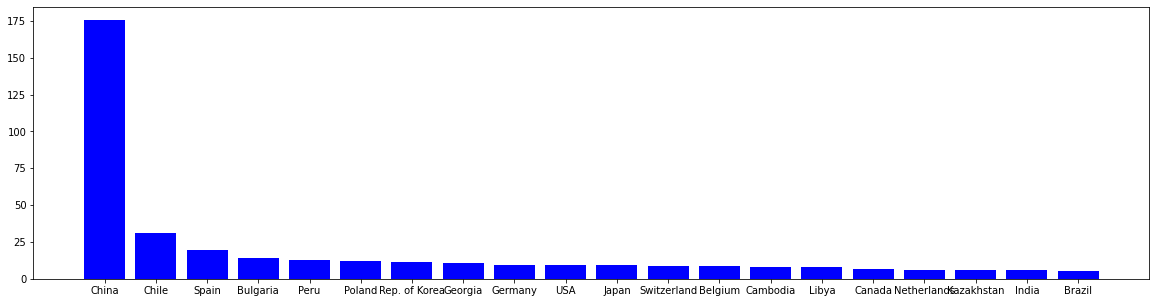

In [6]:
net.drawEntropiesBar()

### 4.2 层次聚类
对个节点的信息熵进行层次聚类，选择聚类数为 6；并为每个节点设置聚类标签，按熵值从大到小标记为 1 - 6

In [7]:
nodes = net.getSortedEntropies()

Es_clusters, nodes = cluster_nodes(nodes, "E", "label", 6)

In [8]:
show_cluster_list(nodes, "label")

,code,name
label,,
1,156,China
2,152,Chile
3,724,Spain
4,"100,604,616,410,268,276,842,392,757,56,116,434","Bulgaria,Peru,Poland,Rep. of Korea,Georgia,Ger..."
5,"124,528,398,699,76,36,484,490,894,710,516,246,458","Canada,Netherlands,Kazakhstan,India,Brazil,Aus..."
6,"608,752,360,643,381,51,688,826,792,180,642,860...","Philippines,Sweden,Indonesia,Russian Federatio..."


### 4.3 选取属性并进行离散化划分

选取以下属性，并选择聚类层数：

* IS：入强度, 6 层，反应进口贸易总额
* OS: 出强度，6 层，反应出口贸易总额
* DC: 度中心性，6 层，反应贸易伙伴的数量
* BC: 中介中心性，6 层，反应在贸易网络中的枢纽性质（不考虑权重）
* CC: 接近中心性，6 层，反应与其他贸易者之间的平均距离（不考虑权重）

属性值由大到小标记为 1-6

In [9]:
nodes, attributes = set_attributes(nodes)

for attr, values in attributes.items():
    cluster, nodes = cluster_nodes(
        nodes, attr, attr, values["layer"])
      
    values["cluster"] = cluster

show_nodes_attribute(nodes)


     code                name  IS  OS  DC  BC  CC  label
0     156               China   1   6   1   1   1      1
2     152               Chile   6   1   2   2   2      2
4     724               Spain   4   5   3   4   2      3
28    757         Switzerland   6   6   5   5   3      4
27    392               Japan   2   6   5   6   3      4
..    ...                 ...  ..  ..  ..  ..  ..    ...
52     40             Austria   6   6   6   6   4      6
49    642             Romania   6   6   5   5   4      6
48    643  Russian Federation   5   6   5   6   3      6
117   212            Dominica   6   6   6   6   6      6
118    50          Bangladesh   6   6   6   6   6      6

[119 rows x 8 columns]


### 4.5 生成决策树

使用 ID3 算法生成决策树

In [10]:
decision_tree = generate_Decision_Tree(nodes, attributes)
show_dt_accuracy(nodes, decision_tree)

{'IS': [1, 2, 3, 4, 5, 6], 'OS': [1, 2, 3, 4, 5, 6], 'BC': [1, 2, 3, 4, 5, 6], 'DC': [1, 2, 3, 4, 5, 6], 'CC': [1, 2, 3, 4, 5, 6]}
决策树的正确率： 94.9579831932773 %


根据决策树生成决策表：

In [11]:
decision_list = ID3.generateList(decision_tree)
pd.DataFrame(decision_list)[attribute_names + ['label']].sort_values('label')

,IS,OS,DC,BC,CC,label
0,NaN,NaN,1,NaN,NaN,1
1,NaN,1.0,2,NaN,NaN,2
2,NaN,2.0,2,NaN,NaN,2
3,NaN,3.0,2,NaN,NaN,2
5,NaN,5.0,2,NaN,NaN,2
...,...,...,...,...,...,...
39,1.0,NaN,5,NaN,NaN,6
64,6.0,NaN,5,6.0,1.0,6
65,6.0,1.0,5,6.0,2.0,6
67,6.0,3.0,5,6.0,2.0,6


### 4.6 层次风险模型

1. 条件属性的概率分布

$$
p_{jA_i} = \frac{\#jA_i}{N}
$$

其中 $A_i$ 表示条件属性，$jA_i$ 表示条件属性 $A_i$ 的属性取值. $\#jA_i$ 表示属性 $A_i$ 取 $j$ 时的样本数，$N$ 表示总样本数。


In [12]:
attributes = set_attribute_probability(nodes, attributes)
show_attributes_distribution(attributes)

  Name                                       Probability
0   IS  [0.0084, 0.0084, 0.0084, 0.0420, 0.1008, 0.8319]
1   OS  [0.0084, 0.0084, 0.0084, 0.0336, 0.0336, 0.9076]
2   BC  [0.0084, 0.0168, 0.0252, 0.0336, 0.1176, 0.7983]
3   DC  [0.0084, 0.0168, 0.0672, 0.0672, 0.2101, 0.6303]
4   CC  [0.0084, 0.1261, 0.2773, 0.2773, 0.1008, 0.2101]


2. 决策规则的概率分布

$$
    P_{\text{Rule}l} = p_{jA_i}\cdots p_{jA_p}
$$

其中，$p_{jA_k}$ 表示在决策规则 $l$ 中对应的各条件属性 $A_k$ 的取值为 $j$ 的概率.

*这里将各条件属性的分布近似看做为相互独立，即某条件属性的取值不受其他条件属性取值的影响*

In [13]:
decision_list = set_decision_probability(decision_list, attributes)
show_decision_probability(decision_list)

    IS   OS  DC   BC   CC         p
0  NaN  NaN   1  NaN  NaN  0.008403
1  NaN  1.0   2  NaN  NaN  0.000141
2  NaN  2.0   2  NaN  NaN  0.000141
3  NaN  3.0   2  NaN  NaN  0.000141
4  NaN  4.0   2  NaN  NaN  0.000565
..  ..  ...  ..  ...  ...       ...
81 NaN  NaN   6  6.0  2.0  0.063421
82 NaN  NaN   6  6.0  3.0  0.139527
83 NaN  NaN   6  6.0  4.0  0.139527
84 NaN  NaN   6  6.0  5.0  0.050737
85 NaN  NaN   6  6.0  6.0  0.105702

[86 rows x 6 columns]


/Users/hozen/Workspace/research-of-cooper-trade/src/main.py:260: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=14)


<Figure size 1440x1440 with 0 Axes>

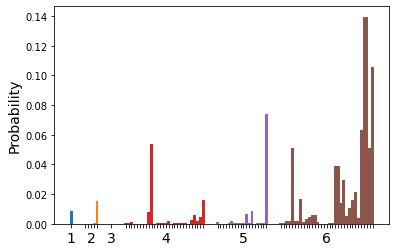

In [14]:
decision_probability_bar(decision_list)

3. 节点脆弱性风险

节点脆弱性在对应离散分区下的层次风险：

$$
  P_j = \sum_{l=1}^MP_{\text{Rule}l}(j_{A_n})
$$
  

In [15]:
risks = get_hierarchical_risk(decision_list)

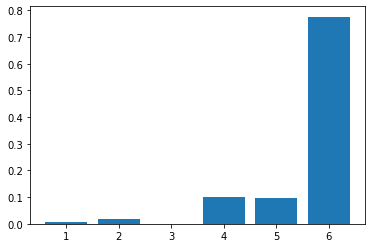

In [16]:
hierarchical_risk_bar(risks)